In [1]:
from asyncio import get_event_loop
from websockets import serve
from matplotlib import pyplot as plt
from matplotlib import patches
from skimage import io, transform
from pylibdmtx.pylibdmtx import decode
from multiprocessing import Pool
from io import BytesIO
from json import dumps, loads, load
from uuid import uuid4
from math import cos, sin, pi
%matplotlib inline

In [2]:
from glob import glob
sorted(glob("../*"))

['../5e8e4f65-b8d8-45eb-8c9f-5ad6709e288f.json',
 '../5e8e4f65-b8d8-45eb-8c9f-5ad6709e288f.png',
 '../README.md',
 '../client',
 '../server']

In [4]:
filesets = [
    ['../5e8e4f65-b8d8-45eb-8c9f-5ad6709e288f.json', '../5e8e4f65-b8d8-45eb-8c9f-5ad6709e288f.png']
]
fileset = 0

In [5]:
meta = load(open(filesets[fileset][0]))
grid = meta['grid']
iscale = meta['scale']


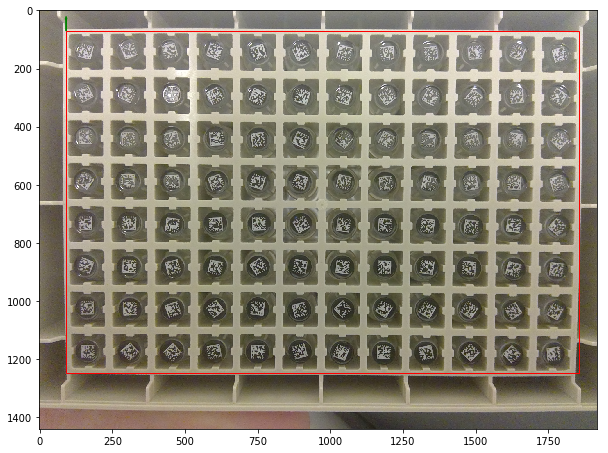

In [27]:
def decode_thread(pospos):
    col, xs, row, ys, well = pospos
    return_package = {'row': row, 'xs': xs, 'col': col, 'ys': ys, 'barcode': 'failed'}
    if well.shape[0] > 0 and well.shape[1] > 0:
        res = decode(well, max_count=1)
        if res:
            return_package['barcode'] = res[0].data.decode()
        else:
            res = decode(well, timeout=1000, threshold=100, max_count=1)
            if res:
                return_package['barcode'] = res[0].data.decode()
    return return_package


im = io.imread(filesets[fileset][1])
scale = im.shape[1] / iscale
fig, ax = plt.subplots(1, figsize=(10, 20))
ax.imshow(im)
rect = patches.Rectangle((grid['left'] * scale, grid['top'] * scale), width=grid['width'] * grid['scaleX'] * scale,
                                                 height=grid['height'] * grid['scaleY'] * scale, angle=grid['angle'], linewidth=1,
                                                 edgecolor='r', facecolor='none')
ar_pa = patches.Arrow(grid['left'] * scale, grid['top'] * scale, cos(((grid['angle'] - 90) / 360) * (2 * pi)) * 50,
                                            sin(((grid['angle'] - 90) / 360) * (2 * pi)) * 50, color='green', width=10)
ax.add_patch(ar_pa)
ax.add_patch(rect)

if grid['width'] > grid['height']:
    grid_size = (grid['width'] / 12) * scale
    orientation = "landscape"
    no_rows = 8
    no_cols = 12
else:
    grid_size = (grid['height'] / 12) * scale
    orientation = "portrait"
    no_rows = 12
    no_cols = 8
width = grid_size * grid['scaleX']
height = grid_size * grid['scaleY']
ori_x = grid['left'] * scale
ori_y = grid['top'] * scale
angle = (grid['angle'] / 360) * 2 * pi
pps = []
for row in range(no_rows):
    for col in range(no_cols):
        dx1 = ori_x + width * col * cos(angle) - height * row * sin(angle)
        dx2 = ori_x + width * col * cos(angle) - height * (row + 1) * sin(angle)
        dx3 = ori_x + width * (col + 1) * cos(angle) - height * (row + 1) * sin(angle)
        dx4 = ori_x + width * (col + 1) * cos(angle) - height * row * sin(angle)
        dxs = [dx1, dx2, dx3, dx4]
        dy1 = ori_y + width * col * sin(angle) + height * row * cos(angle)
        dy2 = ori_y + width * col * sin(angle) + height * (row + 1) * cos(angle)
        dy3 = ori_y + width * (col + 1) * sin(angle) + height * (row + 1) * cos(angle)
        dy4 = ori_y + width * (col + 1) * sin(angle) + height * row * cos(angle)
        dys = [dy1, dy2, dy3, dy4]

        well = im[int(min(dys)):int(max(dys)), int(min(dxs)):int(max(dxs))]
        pps.append([col, dx1, row, dy1, well])

#with Pool(8) as p:
#    rar = p.map(decode_thread, pps)

failed_wells = []
for rar in pps:
    irar = decode_thread(rar)
    if irar['barcode'] == 'failed':
        color = 'red'
        lw = 3
        failed_wells.append(rar[4])
    else:
        color = 'green'
        lw = 1
    mrect = patches.Rectangle((irar['xs'], irar['ys']), width=width, height=height, angle=grid['angle'], linewidth=lw, edgecolor=color,facecolor='none')
    ax.add_patch(mrect)


plt.show()

ImportError: Qt bindings are not installed

In [103]:
[decode(x, timeout=1000, gap_size=1, max_count=1) for x in failed_wells]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [104]:
for i, well in enumerate(failed_wells):
    print(i)
    for i in range(0,360,10):
        res = decode(transform.rotate(well, i, resize=True), max_count=1)
        if res:
            print(res[0].data.decode())
            break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


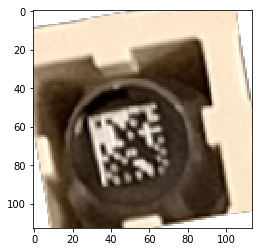

In [83]:
plt.imshow(transform.rotate(well, 10))